<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/85_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 85: Support Vector Machines - Margins

### Teacher-Student Activities

In the previous class, you learned to visualise the hyperplanes generated by a Support Vector Classifier (SVC) using the `numpy.meshgrid()` function and `contourf()` function of the `matplotlib.pyplot` module. In this class, you will learn how to visualise the support vectors and margins.

Let's quickly go through the activities covered in the previous classes and begin this class from **Activity 1: Support Vector Visualisation** section.

---

### Data Description

The dataset used in the problem statement, popularly known as **Iris Dataset** or **Fisher's Dataset**, is published by UCI Machine Learning Repository. It contains 3 classes of 50 instances each, where each class refers to a type of Iris flower namely:
- **Iris-setosa**
- **Iris-virginica**
- **Iris-versicolor**

<img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/Iris-update-1.png' width = 800>

***Image Credits:*** https://en.wikipedia.org/wiki/Iris_flower_data_set
```
  A. Image of Iris setosa by SteinsplitterBot, used under license Attribution-Share Alike 3.0 Unported from Wikimedia Commons.
  B. Image of Iris versicolor by Dlanglois, used under license Attribution-Share Alike 2.5 Generic from Wikimedia Commons.
  C. Image of Iris virginica by Flickr upload bot, used under license Attribution-Share Alike 2.0 Generic from Wikimedia Commons.
```

The big idea is that based on the length and width of sepals and petals of a flower, can we build a classification model that tells us the species of a particular Iris flower? The answer is "yes, we can". This is exactly what we will do in the next few classes.

The columns in the dataset are as follows:

|Name|Description|
|-|-|
|`Id`| Id of the instance or record|
|`SepalLengthCm`| Length of the sepal in cm|
|`SepalWidthCm`| Width of the sepal in cm|
|`PetalLengthCm`| Length of the petal in cm|
|`PetalWidthCm`|Width of the petal in cm|
|`Species`|Name of the type of the flower|

**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/iris  

**Dataset Creator:** R. A. Fisher

**Citation:**
```
Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.
```



---

#### Recap

So let's go through the routine steps before we build a classification model and explore the dataset.

Link to the dataset: https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv

In [ ]:
# Load the dataset.
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset.
iris_df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/iris-species.csv")
print(iris_df.head(), "\n")

# Get information about the dataset.
print(iris_df.info(), "\n")

# Get the count of each type of flower samples in the dataset.
print(iris_df['Species'].value_counts(), "\n")

# Add a column in the Iris DataFrame to resemble non-numeric 'Species' column as numeric using 'map()' function.
# Create the numeric target column 'Label' to 'iris_df' using 'map()'.
iris_df['Label'] = iris_df['Species'].map({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})

# Verify the count of each type of flower samples in the 'Label' column.
print(iris_df['Label'].value_counts())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None 

Iris-setosa

----

#### Data Visualisation

Scatter plot between `SepalLengthCm` and `PetalLengthCm` to differentiate between the data points of different classes using the `hue` parameter:

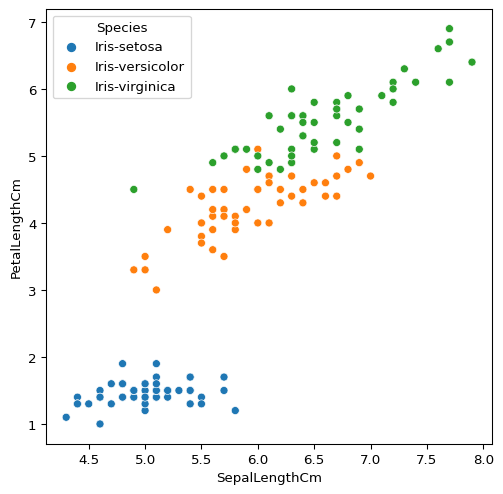

In [ ]:
# Scatter plot between the 'SepalLengthCm' and 'PetalLengthCm' columns and differentiate between the data points of different classes.
plt.figure(figsize = (6, 6), dpi = 96)
sns.scatterplot(data = iris_df, x = 'SepalLengthCm', y = 'PetalLengthCm', hue = 'Species')
plt.show()

As per the properties, the output again displays two clusters where the **`Iris-setosa`** has the smallest sepal length and petal length of the three classes, **`Iris-versicolor`** has the medium petal length and **`Iris-virginica`** has a high petal length. But due to the small margin between the medium and high sepal length, the **`Iris-versicolor`** and **`Iris-virginica`** data points are overlapping each other.

Similarly, we saw a relation between other columns as well.

----

#### Model Building

Let's create a new SVM classification model using the independent features `SepalLengthCm` and `PetalLengthCm` only and target variable as `Label` which will classify the flowers into label `0`, `1`, and `2`:

In [ ]:
# Create an SVM-based classification model to classify the species of the Iris flower into the labels '0', '1', and '2'.
# Import all the libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Create X and y variables
X = iris_df[['SepalLengthCm', 'PetalLengthCm']]
y = iris_df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Create the SVC model
svc_model = SVC(kernel = 'linear',)#model building
svc_model.fit(X_train, y_train)#model training with train data
print(f"Accuracy score: {svc_model.score(X_train, y_train) * 100}%\n")

#  Make predictions on the train dataset using the 'predict()' function.
# Compute the predictions
svc_y_train_pred = pd.Series(svc_model.predict(X_train))#model prediction for  train

# Print the occurrence of each flower type computed in the predictions.
print(f"Labels identified for the TRAIN set:\n{svc_y_train_pred.value_counts()}\n")

# Make predictions on the test dataset using the 'predict()' function.
# Compute the predictions
#prediction will be in array format so you cannot take value_counts() for the predicted output directly..you have convert to series
svc_y_test_pred = pd.Series(svc_model.predict(X_test))#model prediction for  test



# Print the occurrence of each flower type computed in the predictions.
print(f"Labels identified for the TEST set:\n{svc_y_test_pred.value_counts()}")

Accuracy score: 96.0%

Labels identified for the TRAIN set:
1    36
2    33
0    31
dtype: int64

Labels identified for the TEST set:
0    19
2    16
1    15
dtype: int64


As it can be observed all three labels are identified. Let's create a confusion matrix to calculate true positives, false positives, true negatives, and false negatives to evaluate the SVC linear model:

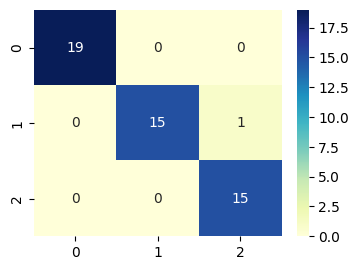

In [ ]:
# Create the confusion matrix (in the form of a heatmap) for the test set.
# Import the libraries
from sklearn.metrics import confusion_matrix, classification_report

# Print the confusion matrix
cm = confusion_matrix(y_test, svc_y_test_pred)
cm_df = pd.DataFrame(data = cm, index = [0, 1, 2], columns = [0, 1, 2])

plt.figure(figsize = (4, 3), dpi = 100)
sns.heatmap(data = cm_df, annot = True, cmap = 'YlGnBu') # 'YlGnBu' sets the colour gradient of the heatmap to yellow, green and blue.
plt.show()

The confusion matrix displays that 1 sample of class `1` is misclassified as class `2`.

Let's print the classification report to observe the recall, precision, and f1-scores for linear SVC on Iris DataFrame:

In [ ]:
# Display the recall, precision and f1-score values for the test set.
print(classification_report(y_test, svc_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



---

#### Activity 1: Support Vector Visualisation

Hyperplanes are created by Support Vector Machine (SVM) to separate the data points between different classes. **Support vectors** are used to create a maximum margin decision boundary for the hyperplane between two different classes. The support vectors, as already mentioned *(in Lesson "Support Vector Machine -Introduction")*, are the data points close to the decision boundary and have the maximum chance of being misclassified by the classifier.

<img src = 'https://s3-whjr-v2-prod-bucket.whjr.online/9f61d98f-6e1a-44e4-afa8-4c08a4c7cdd1.png' width = 800 height = 500>

The model object created using the `SVC` class of `sklearn.svm` provides three attributes to work with the support vectors selected by the model object when the model is trained. These attributes are:

- `n_support_`

- `support_`

- `support_vectors_`

Let's understand all three with respect to the SVC model.

The **`n_support_`:** Provides an array for the number of the support vectors for each class.

> **Syntax**: `model.n_support_`

Let's print the number of support vectors for all three Iris flower:


In [ ]:
 # T1.1: Print the number of support vectors for data trained for model 'svc_model'.
print(f"Number of support vectors in every class of training dataset: {svc_model.n_support_}")
print(f"Number of support vectors in class 0 (Iris-setosa) of training dataset: {svc_model.n_support_[0]}")
print(f"Number of support vectors in class 1 (Iris-virginica) of training dataset: {svc_model.n_support_[1]}")
print(f"Number of support vectors in class 2 (Iris-versicolor) of training dataset: {svc_model.n_support_[2]}")

Number of support vectors in every class of training dataset: [ 2 12 13]
Number of support vectors in class 0 (Iris-setosa) of training dataset: 2
Number of support vectors in class 1 (Iris-virginica) of training dataset: 12
Number of support vectors in class 2 (Iris-versicolor) of training dataset: 13


As it can be observed in the output of `n_support_`, there are  27 support vectors selected in the model out of which `2` are from class `0`, `12` are from class `1`, and `13` are from class `2`.

The **`support_`:** Attribute provides the indices of the support vectors in the data used for training the model.

> **Syntax**: `model.support_`

Now let's print the index of support vectors in training data `X_train`:

In [ ]:
# S1.1: Print the index of support vectors for data trained for model 'svc_model'.
print(f"Number of support vectors in every class of training dataset: {svc_model.support_}")


Number of support vectors in every class of training dataset: [ 8 11 10 20 22 36 48 61 63 65 67 92 93 96  2 25 34 39 40 42 53 59 60 70
 73 79 85]


As it can be observed, the index is returned by `support_`. These indices are not the actual indices of the original DataFrame or `X_train` but the position at which the support vectors are in the training model `X_train`. Hence, to get the exact support vectors we have to get the data from each of these indices or we can use the third variable.

The **`support_vectors_`:** Attribute provides an array of all the support vectors in the data used for training the model.

> **Syntax**: `model.support_vectors_`

Let's print the value of all the support vectors selected:

In [ ]:
# S1.2: Print the support vectors for data trained for model 'svc_model'.
print(f"Number of support vectors in every class of training dataset: {svc_model.support_vectors_}")


Number of support vectors in every class of training dataset: [[5.1 1.9]
 [4.8 1.9]
 [6.3 4.9]
 [5.7 5. ]
 [6.  4.8]
 [5.8 5.1]
 [6.  5. ]
 [6.2 4.8]
 [6.4 5.3]
 [6.9 5.4]
 [6.5 5.2]
 [5.6 4.9]
 [5.9 5.1]
 [4.9 4.5]
 [5.6 4.5]
 [5.4 4.5]
 [6.7 5. ]
 [5.9 4.8]
 [5.1 3. ]
 [6.  5.1]
 [6.3 4.9]
 [6.1 4.7]
 [6.5 4.6]
 [6.1 4.6]
 [5.5 4.4]
 [4.9 3.3]
 [6.9 4.9]]


The output above shows the values of feature columns `SepalLengthCm` and `PetalLengthCm` for all the 27 support vectors selected.

Let's visualise these support vectors in the scatter plot between columns `SepalLengthCm` and `PetalLengthCm` along with all the other data points:

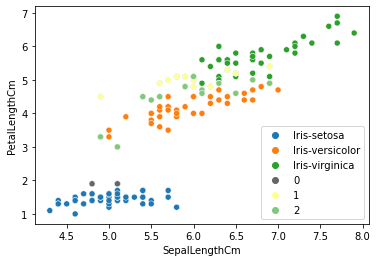

In [ ]:
# S1.3: Scatter plot between the 'SepalLengthCm' and 'PetalLengthCm' columns to observe the support vectors among the data points
import seaborn as sns
sns.scatterplot(x=iris_df['SepalLengthCm'],y=iris_df['PetalLengthCm'],hue=iris_df['Species'])

sns.scatterplot(x = np.array(X_train)[svc_model.support_,0],y = np.array(X_train)[svc_model.support_,1],hue = np.array(y_train)[svc_model.support_],palette = "Accent_r")

In the above code,
- We are creating a normal scatter plot for the columns `SepalLengthCm` and `PetalLengthCm` differentiating them by Iris flower classes  -`Iris-setosa`, `Iris-virginica`, `Iris-versicolor`.
- Then we are creating a scatter plot for support vectors by converting `X_train` and `y_train` into NumPy arrays to get the positions of support vectors correct using `support_` for both feature columns.
- We are differentiating them by labels - `0`, `1`, and `2` since the `y_train` used for training the model has numeric data.
- We are also adding a different colour palette to the markers using `palette="Accent_r"` to differentiate between data points and support vectors.


As it can be observed in the output of the graph and `n_support_`,  class `0` i.e. `Iris-setosa` has only 2 support vectors whereas  class `1` i.e.`Iris-virginica` and class `2` i.e `Iris-versicolor` have 12 and 13 respectively.

The reason is that class `0` is easily separable so it requires fewer support vectors to maximize the margin. But class `1` and class `2` are overlapping each other, hence, they require more support vectors to create a tight margin so separate data points in both classes from each other.

The support vector or margin created adds confidence about the separation of data points between two labels.

Let's understand the margins in detail using their visualisations for the SVC model in the next activity.


---

####Activity 2: The `decision_function()` Function
Multiclass classification prediction  for some algorithms such as Support Vector Machine involves breaking the problem into multiple binary classification function.

There are two common methods available for approaching a multiclass classification which are:
1. **One-vs-Rest (OvR):** Also known as the One-vs-All approach breaks the problem into one label versus the rest of the labels.
  For example, for the Iris flower dataset, we have three classes class `0`, `1`, and `2`. So the binary classification models will be:

  **i.** class `0` vs class [`1` and `2`]

  **ii.** class `1` vs class [`0` and `2`]

  **iii.** class `2` vs class [`0` and `1`]

  The output of each model will be the probability of that class membership for the instance to be predicted. The maximum of the probabilities (in this case maximum of three probabilities) are used for the prediction of class for that instance.

2. **One-vs-One (OvO):** This approach breaks the problem into each label versus the other to create multiple binary classification problems.
  For example, for the Iris flower dataset, we have three classes class `0`, `1`, and `2`. So the binary classification models will be:

  **i.** class `0` vs class `1`

  **ii.** class `0` vs class `2`

  **ii.** class `1` vs class `2`

  The number of problems created can be given by the formula:
  
  $$ \frac{n * (n-1)}{2} $$

  Where `n` is the number of classes or labels.

  Again each model predicts one class out of the two. The class with the maximum predictions in the result wins and is returned as the prediction for the output of the instance given as input.

Let's print the SVC classification model object and observe the value for the `decision_function_shape` parameter:

In [ ]:
# S2.1: Print SVC classification model object
svc_model

SVC(kernel='linear')

As it can be observed, `decision_function_shape='ovr'`. This  `decision_function_shape` parameter defines the shape of the output of the `decision_function()` as One-vs-Rest which is used to predict the labels for the classification of instances.

After the model is trained using the `SVC` class of `sklearn.svm`, one of the functions that we can use to predict the class of an instance is the `decision_function()` function.  The `decision_function()` function is also known as the output of training the model.

Let's invoke the `decision_function()` using the model object for any record, (say record at index `-3`) in `X_train` and observe the output:

In [ ]:
# S2.2: Print the output 'decision_fucntion()' for any record in 'X_train'.
svc_model.decision_function(np.array(X_train)[-3].reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array([[ 2.25948867, -0.3059426 ,  1.29482256]])

As it can be observed in the output, three values are returned. One for the output of each binary classification problem:
  
  **i.** class `0` vs class [`1` and `2`]: 2.25948867

  **ii.** class `1` vs class [`0` and `2`]: -0.3059426

  **iii.** class `2` vs class [`0` and `1`]: 1.29482256

  As the output of the first problem is maximum, class `0` has the highest confidence and the output predicted should be class `0`.

  Let's observe the output for the same instance using `predict()` function and the actual output in the `y_train` for the same:



In [ ]:
# S2.3: Print the predicted and actual output for same record in 'X_train'.
print(svc_model.predict(np.array(X_train)[-3].reshape(1,-1)))
print(np.array(y_train)[-3])

[0]
0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


As it can be observed, the output of the `predict()` function is also class `0` and the actual output in `y_train` is also class `0`. Therefore, we have a correct prediction.

Let's try `decision_function()` again on any instance of testing data `X_test` (again say -3 index) and compare with the actual and predicted output:

In [ ]:
# S2.4: Print the output of 'decision_function()' and predicted and actual output for same record in 'X_test'.
print(svc_model.decision_function(np.array(X_train)[-3].reshape(1,-1)))
print(svc_model.predict(np.array(X_train)[-3].reshape(1,-1)))
print(np.array(y_train)[-3])

[[ 2.25948867 -0.3059426   1.29482256]]
[0]
0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


The output of the `decision_function()` is `[-0.2853259   2.25606206  1.2414949 ]` with class `1` having maximum confidence. The output of the `predict()` and actual output is also class `1`. Again, we have the correct prediction.

**Note:**  Remember the predictions don't need to be always the same as actual output. But they are not the same as actual values because of the output of the binary classification problems in `decision_function()`.

This `decision_function()` output can be used to create contour lines for the margins of the hyperplanes using the support vectors.

But at this point, it will be difficult to see the margins for all the hyperplanes. So we will work on the visualisation of the hyperplane to classify class `1` and class `2` in the next activity.

---

####Activity 3: Margin Visualisation for SVC (Linear Kernel)

The `decision_function()` with OvR approach not only gives confidence for the prediction of the classes but also can be used to measure the distance of that instance or data point to another class.

As already mentioned, we are visualising the margins between the two classes for now. Class `0` and class `1` or class `2` are linearly separable but class `1` and `2` are overlapping each other. So let's visualise the margin between classification in class `1` and `2` to understand the margins created by different kernels.

For that, we have to recreate the SVC classification model with instances of just class `1` and class `2`.

Let's create a new SVM classification model using the independent features `SepalLengthCm` and `PetalLengthCm` only and target variable as `Label` which will classify the flowers into class `1` and class `2`:


In [ ]:
# S3.1: Create an SVM-based classification model to classify the species of the Iris flower into the labels  '1', and '2'.
X = iris_df.loc[iris_df["Label"]!=0,['SepalLengthCm', 'PetalLengthCm']]
y =iris_df.loc[iris_df["Label"]!=0,"Label"]
# Split the data into training and testing sets
svc_model_1 = SVC(kernel = 'linear',)#model building
svc_model_1.fit(X,y)#model training with train data


SVC(kernel='linear')

In the output, we can see the SVC classification model is created with `decision_function_shape='ovr'` and `kernel='linear'`.

Let's print the number of support vectors for the model:

In [ ]:
# S3.2: Print the number of support vectors for data trained for model 'svc_model'.
print(f"Number of support vectors in every class of training dataset: {svc_model_1.n_support_}")
print(f"Number of support vectors in class 1 (Iris-virginica) of training dataset: {svc_model_1.n_support_[0]}")
print(f"Number of support vectors in class 2 (Iris-versicolor) of training dataset: {svc_model_1.n_support_[1]}")

Number of support vectors in every class of training dataset: [15 17]
Number of support vectors in class 1 (Iris-virginica) of training dataset: 15
Number of support vectors in class 2 (Iris-versicolor) of training dataset: 17


There are total 32 support vectors: 15 for class `1` and 17 for class `2`. That means that the classification may not be simple as it does not requires significant amount of support vectors to create the margin.

Now let's create the visualisation of the plot using the following steps:

1. Create or get the current axes for the graph using `gca()` function of `matplotlib.pyplot` module and save it in the variable `ax`.

2. Create a scatter plot using `matplotlib.pyplot` module between columns `SepalLengthCm` and  `PetalLengthCm` i.e. column `0` and `1` of `X` DataFrame with colour of markers differentiated by the class in `y` series:

 **i.** Colormap: `cmap = "Accent"`

 **ii.** Marker size: `s = 50`

3. Get the lower and upper limits array for x and y axes for the mesh grid from the graph created by invoking the `get_xlim()` function and `get_ylim()` function using the graph object `ax` created above. Save the output arrays with two values each (lower limit and upper limit) in two separate variables `xlim` and `ylim`.

4. Create two different 1D arrays of 50 items each as `x_ax` and `y_ax` from the `xlim` and `ylim` array's `0th` item as the lower limit and `1st` item as the upper limit.

5. Call the `meshgrid()` function and pass the 1D arrays created from the x-axis and y-axis and save the mesh grid in two different 2D arrays `xx` and `yy`.

6. Flatten the `xx` and `yy` arrays using the `ravel()` of the `numpy` module function. Create the vertical stack using the flatten arrays using the `vstack()` function of the `numpy` module. Transpose the vertical stack. Save the output in variable `xy`.

7. Call the `decision_function()` function on the classification object and pass the vertical stack `xy` as input to get the class prediction confidence value  for those points to build the margins and hyperplanes. Transpose the output and save the confidence value array in `z` variable.

8. Create the contour plot for `xx`, `yy`, and `z` with:

 **i.** Distance between margins: `levels = [-1,0,1]`: Here `0` will be the hyperplane, `-1` will be the margin line to the left or below the hyperplane and `1` will be the margin line to the right or above the hyperplane.

 **ii.** Line styles: `linestyles = ['--','-','--']`: To differentiate between the margin lines and hyperplanes.

 **ii.** Transparency: `alpha = 0.3`: For the visibility of the lines.

9. Create a scatter plot for support vectors using `matplotlib.pyplot` module using the model object and `support_vector_` variable - `svc_linear_1.support_vectors_[:, 0]`, and `svc_linear_1.support_vectors_[:, 1]` :

  **i.** Marker size: `s = 100`: To overlap the data points.

 **ii.** Width of the line: `linewidth = 1`.

 **ii.** Color of marker: `facecolors = None` (no color fill) and `edgecolor ='black'` (black boundary).

10. Display the colorbar.

11. Display the graph.



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


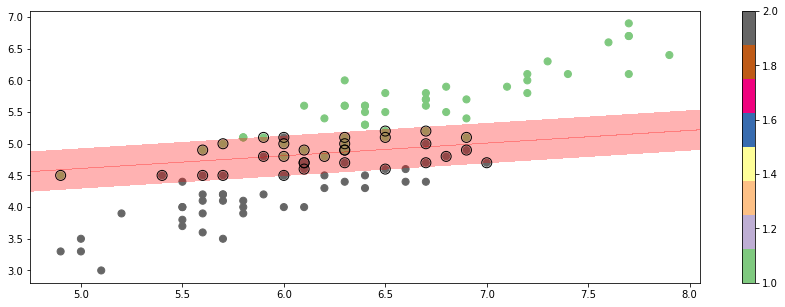

In [ ]:
# S3.3: Create the margin visualisation for the SVC linear classification for class '1' and '2'.

plt.figure(figsize=(15,5))
ax = plt.gca()

# Create the scatter plot for 'SepalLengthCm' and 'PetalLengthCm' using the given customization
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='Accent')
#sns.scatterplot(X.iloc[:, 0], X.iloc[:, 1], hue=y, palette='Accent_r')

# Get the lower and upper limits form the graph object
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create the 1D arrays of 50 items for mesh grid using lower and upper limits
x_ax = np.linspace(xlim[0], xlim[1], 50)#one dim
y_ax = np.linspace(ylim[0], ylim[1], 50)

# Create the mesh grid from the 1D arrays
xx, yy = np.meshgrid(x_ax, y_ax)#xx and yy are 2 dim array

# Create the vertical array using the 2D arrays of mesh grid
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Create the class prediction confidence array for vertical arrays
z = svc_model_1.decision_function(xy).reshape(xx.shape)

# Create the contour lines for the hyperplane and margin
ax.contourf(xx, yy, z, colors='red', levels=[-1, 0, 1], alpha=0.3, linestyles = ['--','-','--'])

# Create the scatter plot for the support vectors
ax.scatter(svc_model_1.support_vectors_[:, 0], svc_model_1.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='black')

# Display the colorbar
plt.colorbar()

# Display the graph
plt.show()


As it can be observed from the graph output class `1` - **`Iris-virginica`** is in green colour, class `2` **`Iris-versicolor`**  is black colour. A red solid line is created for the decision surface and two red dashed `--` margins are created using the support vectors for the model to classify the data points.

The decision surfaces created are linear because of the linear SVC model. As the data points in class `1`  and class `2` are overlapping each other, these margins can be used to classify as many data points as possible accurately.

The surface created in red required the `decision_function()` for all the x and y coordinates. And `decision_function()` takes only the features array (one input) of the shape of features array `X` as input. Hence we have used the `vstack()` function of the `numpy` module.

Let's take a look at the working of the `vstack()` function of the `numpy` model.

**The `vstack()` function** will stack the items of arrays together vertically one after another row wise. This is similar to concatenation of two arrays of 1D shaped as (N,) to (N,1).


The syntax for `vstack()` function is:
> **Syntax:** `numpy.vstack(tup)`

The `vstack()` function takes a tuple of arrays to be stacked as input and returns the array with a number of rows similar to the total rows input.

Let's understand the working of `vstack()` by creating a stack array from the two different 2D arrays and 3D arrays:


In [ ]:
# S3.4: Run the code cell to create a vertical stack from two different 2D arrays and 3D arrays

# Create two different 2D arrays
print("2D arrays")
a = np.random.randint(1,10,(2,5))
print(f"First 2D array \n{a}")
b = np.random.randint(10,14,(2,5))
print(f"Second 2D array \n{b}")

# Create the vstack from 2D arrays
vstack_1 = np.vstack((a,b))
print((f"The vstack array \n{vstack_1}"))


# Create two different 3D arrays
print("3D arrays")
a = np.random.randint(1,10,(2,2,2))
print(f"First 3D array \n{a}")
b = np.random.randint(10,14,(2,2,2))
print(f"Second 3D array \n{b}")

# Create the vstack from 3D arrays
vstack_2 = np.vstack((a,b))
print((f"The vstack array \n{vstack_2}"))

2D arrays
First 2D array 
[[6 6 4 3 7]
 [1 9 3 5 8]]
Second 2D array 
[[12 13 10 10 12]
 [13 10 13 12 10]]
The vstack array 
[[ 6  6  4  3  7]
 [ 1  9  3  5  8]
 [12 13 10 10 12]
 [13 10 13 12 10]]
3D arrays
First 3D array 
[[[7 5]
  [2 3]]

 [[7 2]
  [9 5]]]
Second 3D array 
[[[13 12]
  [12 10]]

 [[12 13]
  [11 12]]]
The vstack array 
[[[ 7  5]
  [ 2  3]]

 [[ 7  2]
  [ 9  5]]

 [[13 12]
  [12 10]]

 [[12 13]
  [11 12]]]


As we can see in the output, regardless of the 2D or 3D arrays in the vstack the arrays are stacked together as rows.

Let's move ahead and improve the model by changing the parameter in the model creation of the `SVC` class constructor and visualise the margins again.

---

####Activity 4: Margin Visualisation for SVC (RBF and Polynomial Kernel)

Gaussian radial basis function (RBF) kernel and Polynomial Kernel used  to improve our model and observe the difference in the model's behaviour by hyperplane visualisation. As the decision surface is non-linear for these kernels is not linear, the margins created for these kernels are also non-linear.

Let's create the model again using the steps in the above activities but change the kernel function to:

- RBF using parameters `kernel ="rbf"` and also `gamma=0.7`.
- Polynomial kernel using parameters `kernel ="poly"` and `gamma='auto` and `degree=3`.


**Note:** Again, for the time being, ignore the reason behind providing the `gamma` and `degree` parameter as an input.




In [ ]:
# S4.1: Create  RBF and Polynomial SVM-based classification models to classify the species of the Iris flower into the labels  '1', and '2'.




In the above code sections, both the models are created. The number of support vectors for both modesl are:

1. **RBF:** Total 35 support vectors. 18 for class `1` and 17 for class `2`
1. **Polynomial:** Total 14 support vectors. 7 for each class `1` and class `2`

Now, let's use a `for` loop and visualize both the models for observing the margins.

In [ ]:
# S4.2: Create margin visualizations for the SVM models for classification of class '1' and '2'



As it can be observed in:

1. **RBF Plot:** The decision boundary and margins are non linear to cover most of the data points.

2. **Polynomial Plot:** In this case, the decision boundary and margins seems similar to linear SVC but a bit narrower.

Hence, with the help of margin visualizations, we can conclude that out of all three SVC models with Linear, RBF and polynomial kernel, RBF SVC models is best suited for the classification of class `1` i.e. `Iris-virginica` and class `2` i.e. `Iris-versicolor`  Iris flowers.


Let's stop here. In the next class, we will learn more about SVM.

---

### **Project**
You can now attempt the **Applied Tech Project 85 - Support Vector Machines - Margins** on your own.

**Applied Tech Project 85 - Support Vector Machines - Margins**: https://colab.research.google.com/drive/194_AVriixVkBbz0rwNxP1qSZMzznIEBs

---